In [18]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = "data/output.json"
with open(data_file, "r", encoding="utf8") as f:
    data_dict = json.load(f)

In [3]:
print(data_dict.keys())

dict_keys(['input', 'regular_qaoa', 'cyclic_qaoa'])


In [13]:
p = data_dict["input"]["p"]
rounds = data_dict["input"]["rounds"]
regular_energy = data_dict["regular_qaoa"]["energy"]
instance = data_dict["input"]["key"]
input_file = data_dict["input"]["hdf_file"]
print(f"Problem instance is {instance} in file {input_file}")
print(f"Optimizing with p= {p} and {rounds} rounds.")
print(f"Regular QAOA final energy = {regular_energy}")

Problem instance is complbipart-n-9_a-4_b-5 in file data/ham-graph-complete_bipart.hdf5
Optimizing with p= 9 and 3 rounds.
Regular QAOA final energy = -19.676402032375336


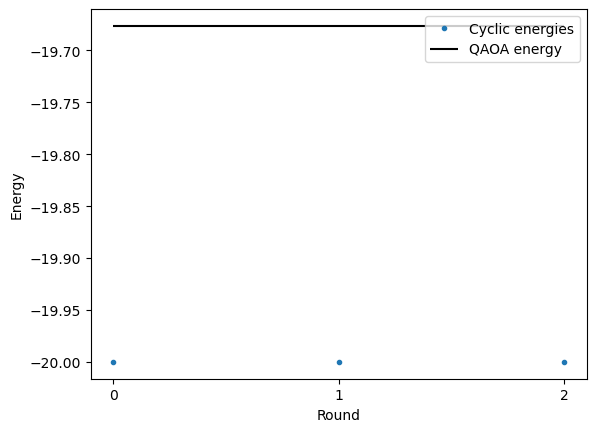

In [37]:
cyclic_energies = np.array(data_dict["cyclic_qaoa"]["energies"])
fig, ax = plt.subplots()
ax.plot(cyclic_energies, '.', label="Cyclic energies")
ax.hlines([regular_energy], 0.0, float(cyclic_energies.size - 1), 'k',\
          label="QAOA energy")
ax.set_xticks(range(cyclic_energies.size))
ax.set_xlabel("Round")
ax.set_ylabel("Energy")
plt.legend()

Text(0.5, 1.0, 'Reference states')

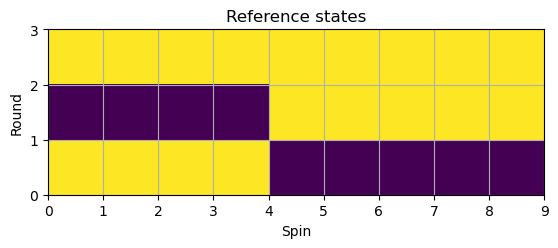

In [35]:
refs = np.array(data_dict["cyclic_qaoa"]["references"])
fig2, ax2 = plt.subplots()
ax2.grid()
ax2.imshow(refs, extent=[0, refs.shape[1], 0, refs.shape[0]])
ax2.set_xlabel("Spin")
ax2.set_ylabel("Round")
ax2.set_title("Reference states")